In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df= pd.read_parquet("../data_transformation/dataset_cleaned.parquet")

# ANALYTIC CATEGORICAL

In [3]:
df_cat= df.select_dtypes(include= 'O')

In [4]:
df_cat.shape

(2073616, 9)

In [ ]:
for col in df_cat.columns:
    print(f'{col.upper}')
    display (df[col].value_counts()/df.shape[0]*100)
    print('________________________')

## Categorical Analysis

- Invoice / Item Number: All categories have the same frequency, as the percentage is identical for each one.

- Store Name: There are 392 unique categories, with the most prominent being Hy-Vee Food Store and Hy-Vee Wine and Spirits.

- County: There are 89 different counties, with the most notable ones being: Polk (17.35%),Linn (8.2%),Black Hawk (5.1%),Scott (6.5%),Johnson (5.03%)

- Category Name: The most prominent categories are: Vodka 80 Proof (12.3%),Canadian Whisky (8.8%)

-  Vendor Name: The top vendors are Diageo Americas (16.9%),Luxco - St. Louis (11.4%),Jim Beam Brands (10.68%)

- Item Description: No standout categories.

- Address: No standout categories.

- City: Most prominent cities are: Des Moines (8.8%),Cedar Rapids (6.3%),Davenport (4.8%)

# ANALYTIC NUMERIC

In [6]:
df_num= df.select_dtypes(include=np.number)

In [7]:
df_num.shape

(2073616, 10)

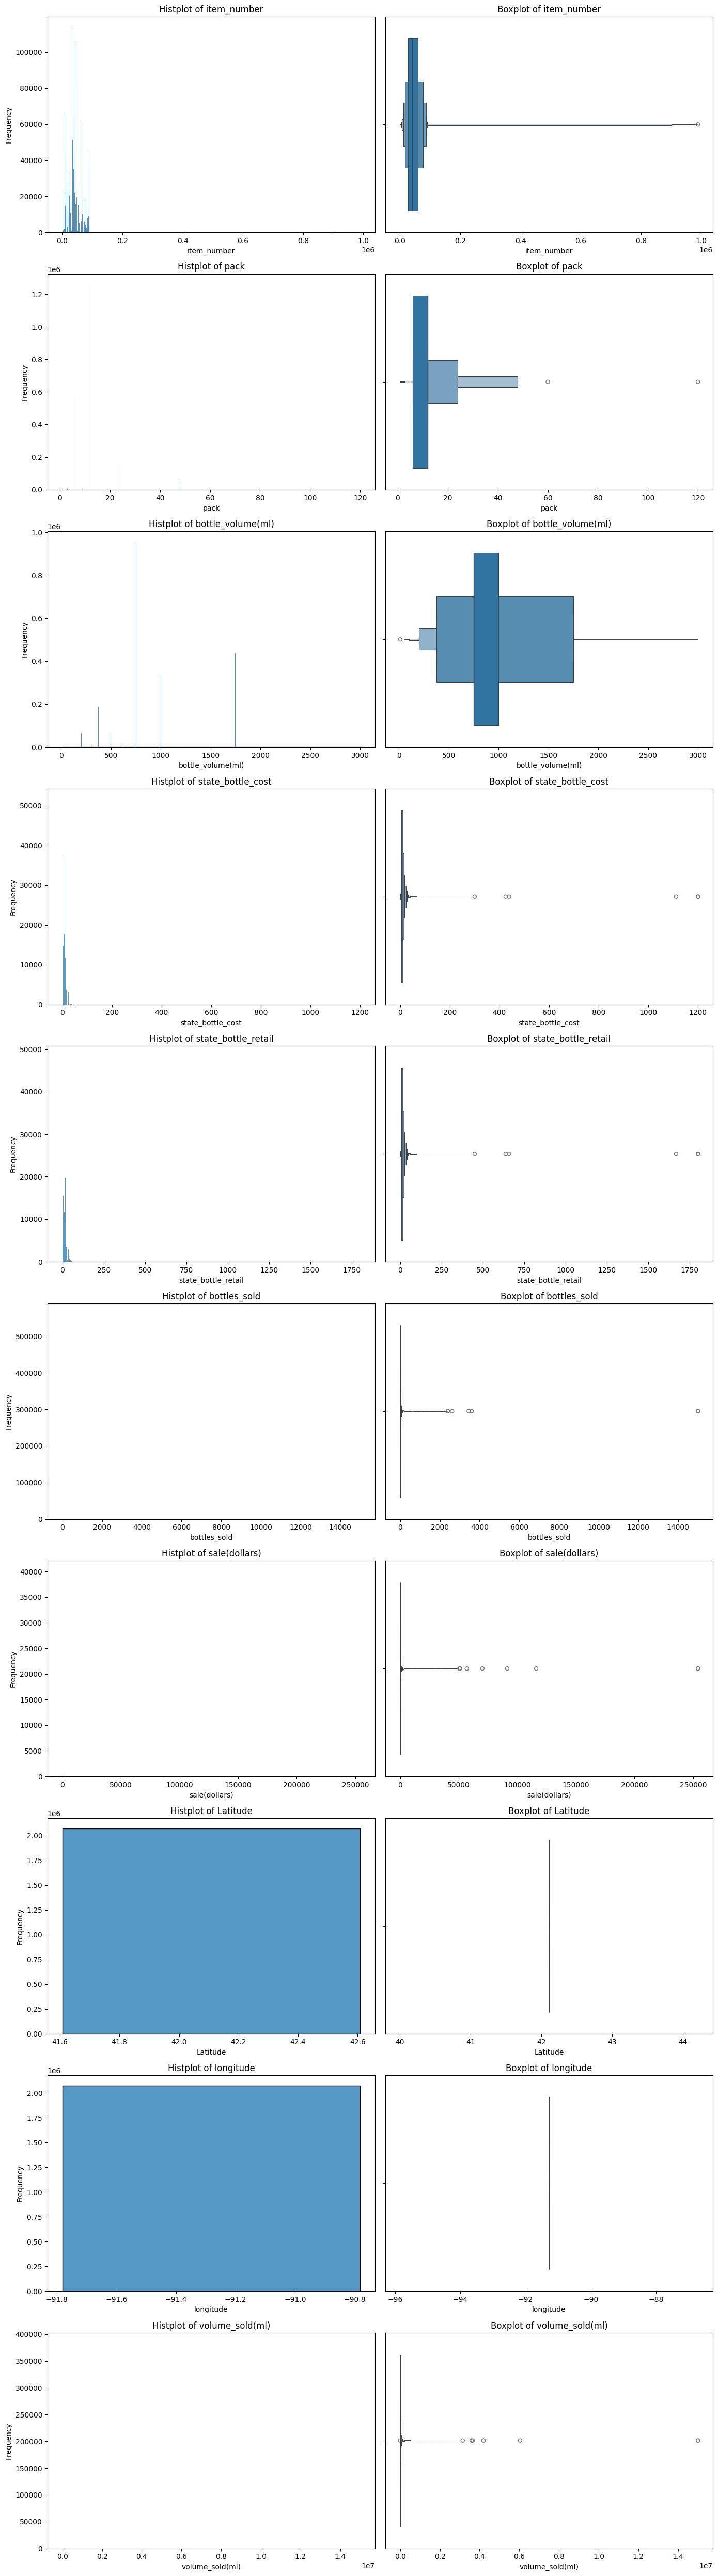

In [8]:
fig, axes = plt.subplots(10, 2, figsize=(14, 50))

for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histplot of {col}')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlabel(col)

    sns.boxenplot(data=df_num, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)
    
plt.tight_layout()  # Ajustar los gráficos
plt.show()  # Mostrar los gráficos

## Numerical Analysis
- Pack:  2 outliers, and they appear around values of 60 and 120.

- Bottle_volume: There are lower outliers, which might make sense due to mini bottles, but most data points are between 25 ml and 1800 ml.

- State_bottle_cost and State Bottle Retail: These are almost identical; the difference is that the retail value is higher because it's the in-store marked-up price.

- bottle_sales: Contains high outliers.

- Volume_Sold_(gallons): Very similar to the previous one, and Volume Sold (ml) has a similar shape, since both come from the same calculation.

In [9]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city', 'poscode',
       'Latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [ ]:
df.drop(columns=['store_location','volume_sold(gallons)'],inplace=True)

## outliers

In [86]:
round(df[df['pack'] > 20].shape[0] / df.shape[0] * 100, 4)

10.2115

In [88]:
round(df[df['bottles_sold'] > 400].shape[0] / df.shape[0] * 100, 4)

0.0595

In [89]:
round(df[df['sale(dollars)'] > 10000].shape[0] / df.shape[0] * 100, 4)

0.0247

In [90]:
round(df[df['volume_sold(ml)'] > 400000].shape[0] / df.shape[0] * 100, 4)

0.0838

In [91]:
round(df[df['bottle_volume(ml)'] > 2500].shape[0] / df.shape[0] * 100, 4)

0.1397

In [111]:
round(df[df['state_bottle_cost'] > 50].shape[0] / df.shape[0] * 100, 4)

0.1027

In [112]:
round(df[df['state_bottle_retail'] > 75].shape[0] / df.shape[0] * 100, 4)

0.1027

In [113]:
df=df[df['bottles_sold'] < 400]
df=df[df['sale(dollars)'] < 10000]
df=df[df['volume_sold(ml)'] < 400000]
df=df[df['bottle_volume(ml)'] < 2500]
df= df[df['state_bottle_retail'] < 75]
df= df[df['state_bottle_cost'] < 50]


In [93]:
df.shape

(2068892, 20)

In [11]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city', 'poscode',
       'Latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

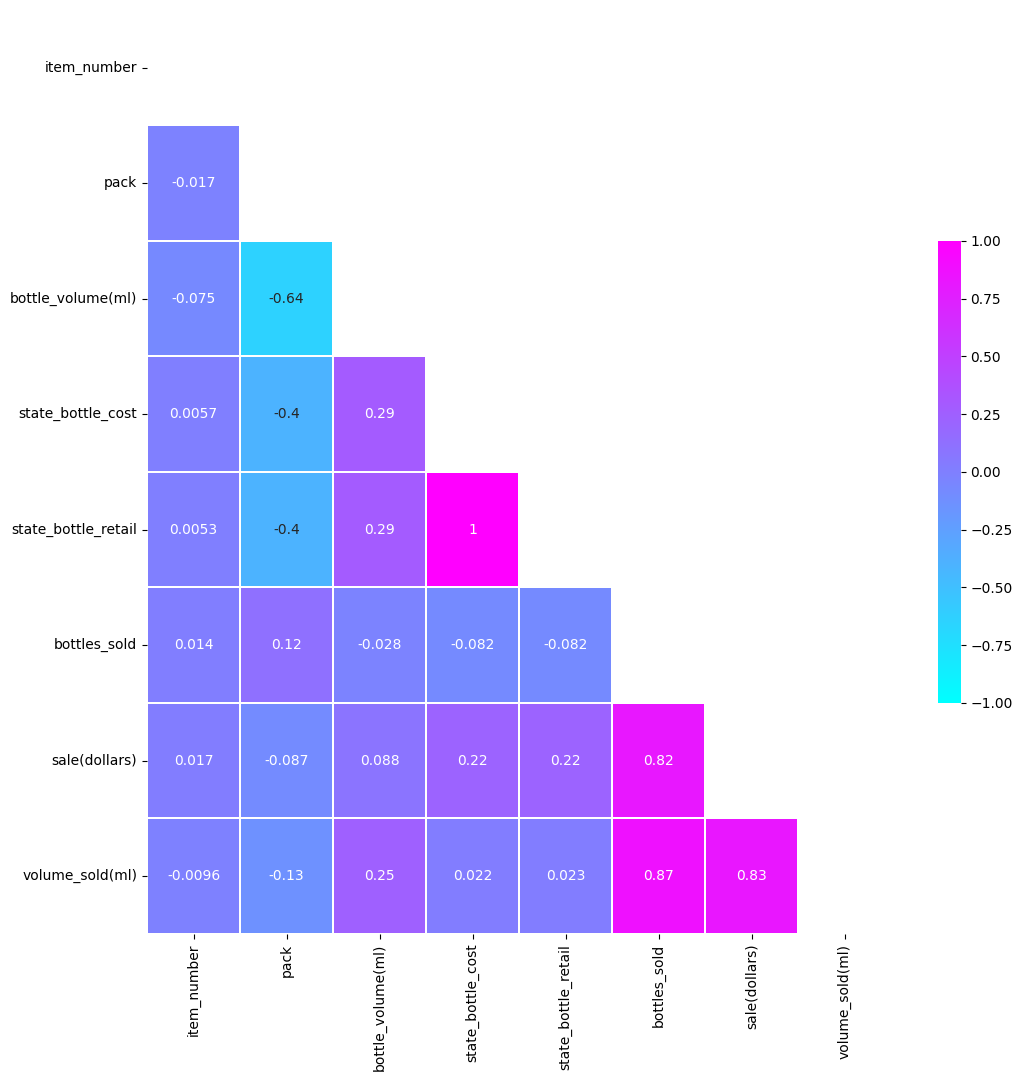

In [ ]:
plt.figure(figsize=(12, 12))
corr = df.drop(columns=["Latitude", "longitude"]).corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap="cool", linewidths=0.2, cbar_kws={"shrink": 0.50}, mask=mask)
plt.show()

# Correlation Matrix Findings

- state_bottle_cost and state_bottle_retail exhibit a moderate negative correlation with pack (same value).
- pack shows a moderate negative correlation with bottle_volume (ml).
- bottle_volume(ml) is positively correlated with both state_bottle_retail and state_bottle_cost.
- state_bottle_cost and state_bottle_retail are perfectly positively correlated.
- bottle_sold correlates with sales (dollars).
- sales(dollars) correlates with volume_sold.

In [ ]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city', 'poscode',
       'Latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [ ]:
df.drop(columns=['store_number','county_number','category_number','vendor_number'],inplace= True)

In [ ]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city', 'poscode',
       'Latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [115]:
df_lat_long = df[(df['Latitude'].notnull()) & (df['longitude'].notnull())]

In [116]:
df_map = df_lat_long.groupby(['Latitude', 'longitude'])['sale(dollars)'].sum().reset_index()

In [117]:
print(df[["Latitude", "longitude"]].notnull().all(axis=1).sum())

2066768


In [ ]:
fig = px.scatter_map(df_map, 
                     lat='Latitude', 
                     lon='longitude', 
                     size='sale(dollars)',
                     zoom=3, 
                     map_style='open-street-map')  
fig.show()

In [ ]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city', 'poscode',
       'Latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [122]:
df_map_sales= df_lat_long.groupby(['Latitude','longitude'])['invoice/item_number'].count().reset_index()

In [123]:
fig = px.scatter_mapbox(df_map_sales, lat = 'Latitude', lon = 'longitude', size = 'invoice/item_number',
                        zoom = 3, mapbox_style = 'open-street-map')
                        
fig.show()

C:\Users\ivanc\AppData\Local\Temp\ipykernel_29628\3826874660.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Evolution of sales and long-term profits

In [33]:
df.columns

Index(['invoice/item_number', 'date', 'store_name', 'county', 'category_name',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume(ml)', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale(dollars)', 'address', 'city', 'poscode',
       'Latitude', 'longitude', 'volume_sold(ml)'],
      dtype='object')

In [124]:
df_data_sales= df.groupby(df['date'].dt.to_period('M'))['invoice/item_number'].count().reset_index()
df_data_sales['date']= df_data_sales['date'].dt.to_timestamp()

<Axes: xlabel='date', ylabel='invoice/item_number'>

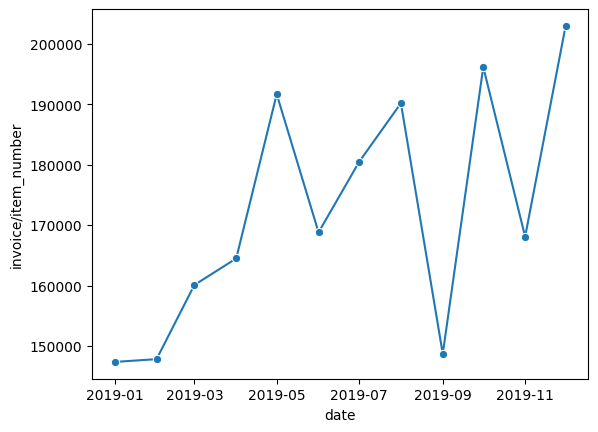

In [125]:
sns.lineplot(x = "date", y = "invoice/item_number", data = df_data_sales,
             marker = "o")


In [126]:
df_data_sales_profit = df.groupby(df['date'].dt.to_period('M'))['sale(dollars)'].sum().reset_index()
df_data_sales_profit['date']= df_data_sales_profit['date'].dt.to_timestamp()

<Axes: xlabel='date', ylabel='sale(dollars)'>

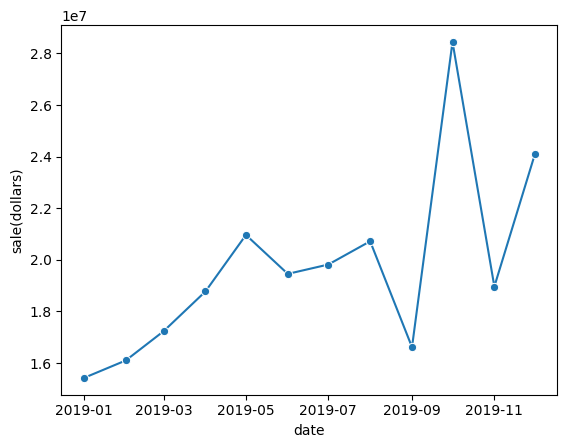

In [127]:
sns.lineplot(x = "date", y = "sale(dollars)", data = df_data_sales_profit, marker = "o")

## Sales and profits over time
- From March to May, there was an increase in sales reflected in the profits. 
- The same occurred during the period from June to July. 
- In September, both sales and profits dropped (check what happened during that period).
-  In October, the number of sales recovered and the profit margin surged. 
- In November, the same situation as in September occurred, meaning a decline. 
- December was the month with the highest sales, but the second highest in terms of profits

## Study of correlation variables

     pack and state_bottle

<Axes: xlabel='pack', ylabel='state_bottle_cost'>

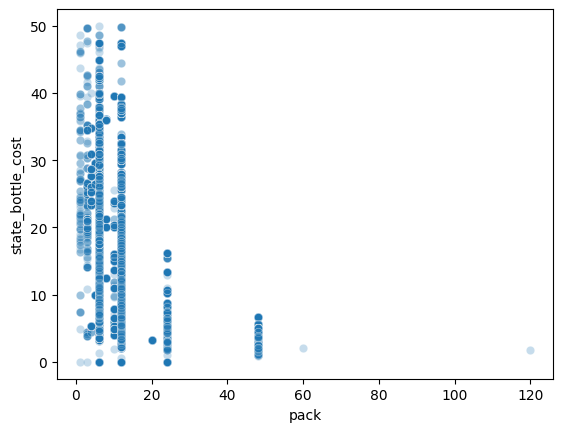

In [128]:
sns.scatterplot(x= "pack", y= "state_bottle_cost", data= df, alpha=0.25)

    pack and bottle_volume(ml)

<Axes: xlabel='pack', ylabel='bottle_volume(ml)'>

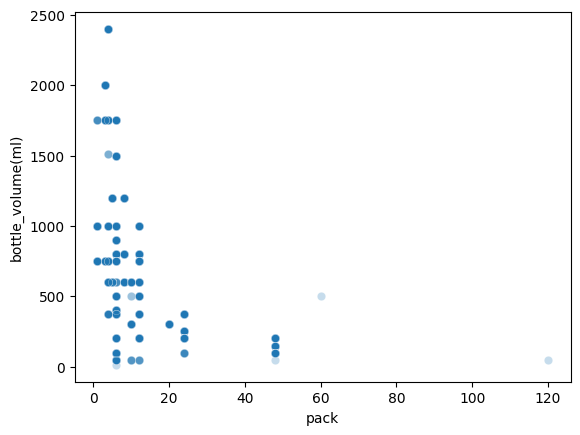

In [129]:
sns.scatterplot(x= "pack", y= "bottle_volume(ml)", data= df, alpha=0.25)

    bottle_volume(ml) and state_bottle

<Axes: xlabel='bottle_volume(ml)', ylabel='state_bottle_cost'>

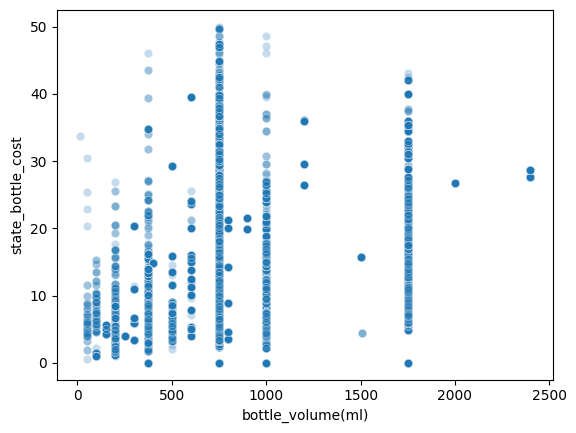

In [130]:
sns.scatterplot(x= "bottle_volume(ml)", y= "state_bottle_cost", data= df, alpha=0.25)

    bottle_sold and sales(dollars)

<Axes: xlabel='bottles_sold', ylabel='sale(dollars)'>

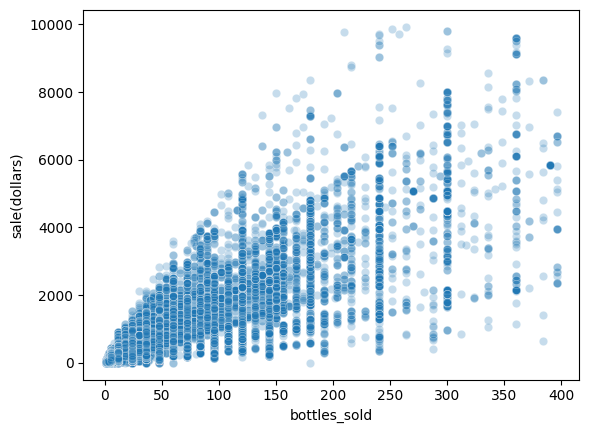

In [131]:
sns.scatterplot(x= "bottles_sold", y= "sale(dollars)", data= df, alpha=0.25)

    bottle_sold and volume_sold(ml)

<Axes: xlabel='bottles_sold', ylabel='volume_sold(ml)'>

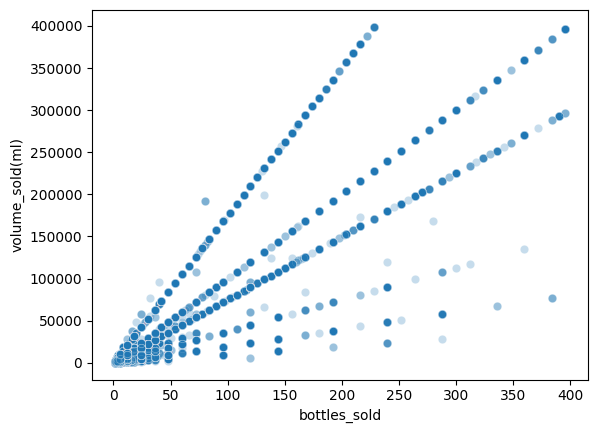

In [133]:
sns.scatterplot(x= "bottles_sold", y= "volume_sold(ml)", data= df, alpha=0.25)

In [134]:
df.to_parquet("../data_transformation/dataset_cleaned.parquet")